# Context : Data Exploration




Source : https://www.amundietf.fr/fr/particuliers/produits/equity/amundi-msci-world-ucits-etf-eur-c/lu1681043599




**Description**

Exploratory Data Analysis of Amundi MSCI World UCITS ETF - EUR (C) - LU1681043599


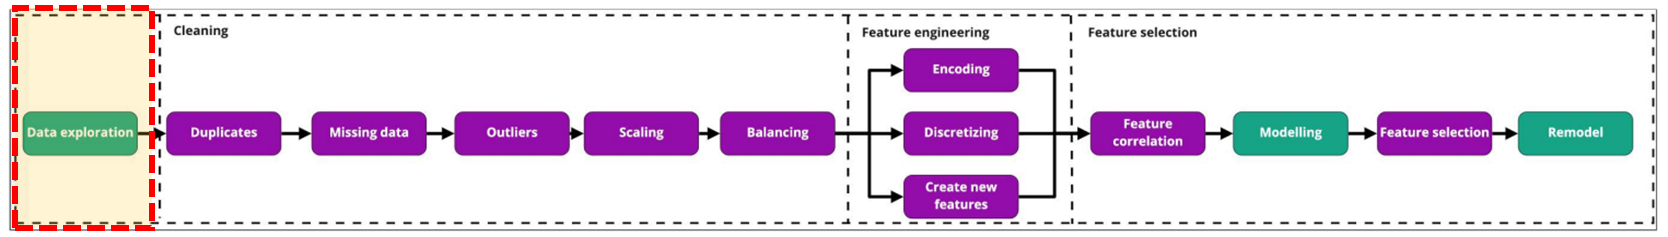


# Imports

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')
# pd.options.display.max_columns = None

import pandas as pd
import numpy as np
from scipy.stats import iqr

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Models
from sklearn.model_selection import train_test_split

# Retrieve data

In [2]:
#Retrieve data
path_to_data = '../data/raw_data/'
path_to_data = path_to_data + 'MSCI_World_UCITS_ETF_EUR_C_LU1681043599.xlsx'
path_to_data


'../data/raw_data/MSCI_World_UCITS_ETF_EUR_C_LU1681043599.xlsx'

In [3]:
# Retrieve data from excel file
msci_world = pd.read_excel( io = path_to_data,         
                            sheet_name = 'Actifs du fonds',

                            # Line used for column names                 
                            header = 1,

                            #List of column names to use.               
                            names=['Code ISIN', 'Nom', "Classe d'actifs",'Devise','Poids','Secteur','Pays'],

                            # Column (0-indexed) to use as the row labels of the DataFrame
                            # index_col = 'Code ISIN',

                            #If list of string, then indicates list of column names to be parsed.
                            usecols=['Code ISIN', 'Nom', "Classe d'actifs",'Devise','Poids','Secteur','Pays'],

                            # Engine compatibility
                            engine = 'openpyxl')
msci_world.head(3)

,Code ISIN,Nom,Classe d'actifs,Devise,Poids,Secteur,Pays
0,DE0007164600,SAP SE / XETRA,EQUITY,EUR,0.079253,Technologies de l'information,Allemagne
1,IE000S9YS762,LINDE PLC,EQUITY,USD,0.053559,Matériaux,États-Unis
2,DK0062498333,NOVO NORDISK A/S-B,EQUITY,DKK,0.051679,Santé,Danemark


# Explore data


## Generic data

In [4]:
# Shape
msci_world.shape

(152, 7)

In [5]:
# Columns
msci_world.columns

Index(['Code ISIN', 'Nom', 'Classe d'actifs', 'Devise', 'Poids', 'Secteur',
       'Pays'],
      dtype='object')

In [6]:
# Statistics
msci_world.describe()

,Poids
count,152.000000
mean,0.005978
std,0.011282
min,0.000026
25%,0.000490
50%,0.002123
75%,0.005368
max,0.079253


## Change column names


In [7]:
# Columns
msci_world.columns

Index(['Code ISIN', 'Nom', 'Classe d'actifs', 'Devise', 'Poids', 'Secteur',
       'Pays'],
      dtype='object')

In [8]:
# Convert column names to lower snake case
msci_world.columns = msci_world.columns\
                                    .str.lower()\
                                    .str.replace("'"," ")\
                                    .str.replace(' ', '_')\
                                    .str.replace('-', '_')\
                                    .str.replace('.', '_')

msci_world.rename(columns={'classe_d_actifs' : 'classe_actifs'}, inplace=True)
msci_world.columns 

Index(['code_isin', 'nom', 'classe_actifs', 'devise', 'poids', 'secteur',
       'pays'],
      dtype='object')

## Répartition par secteur


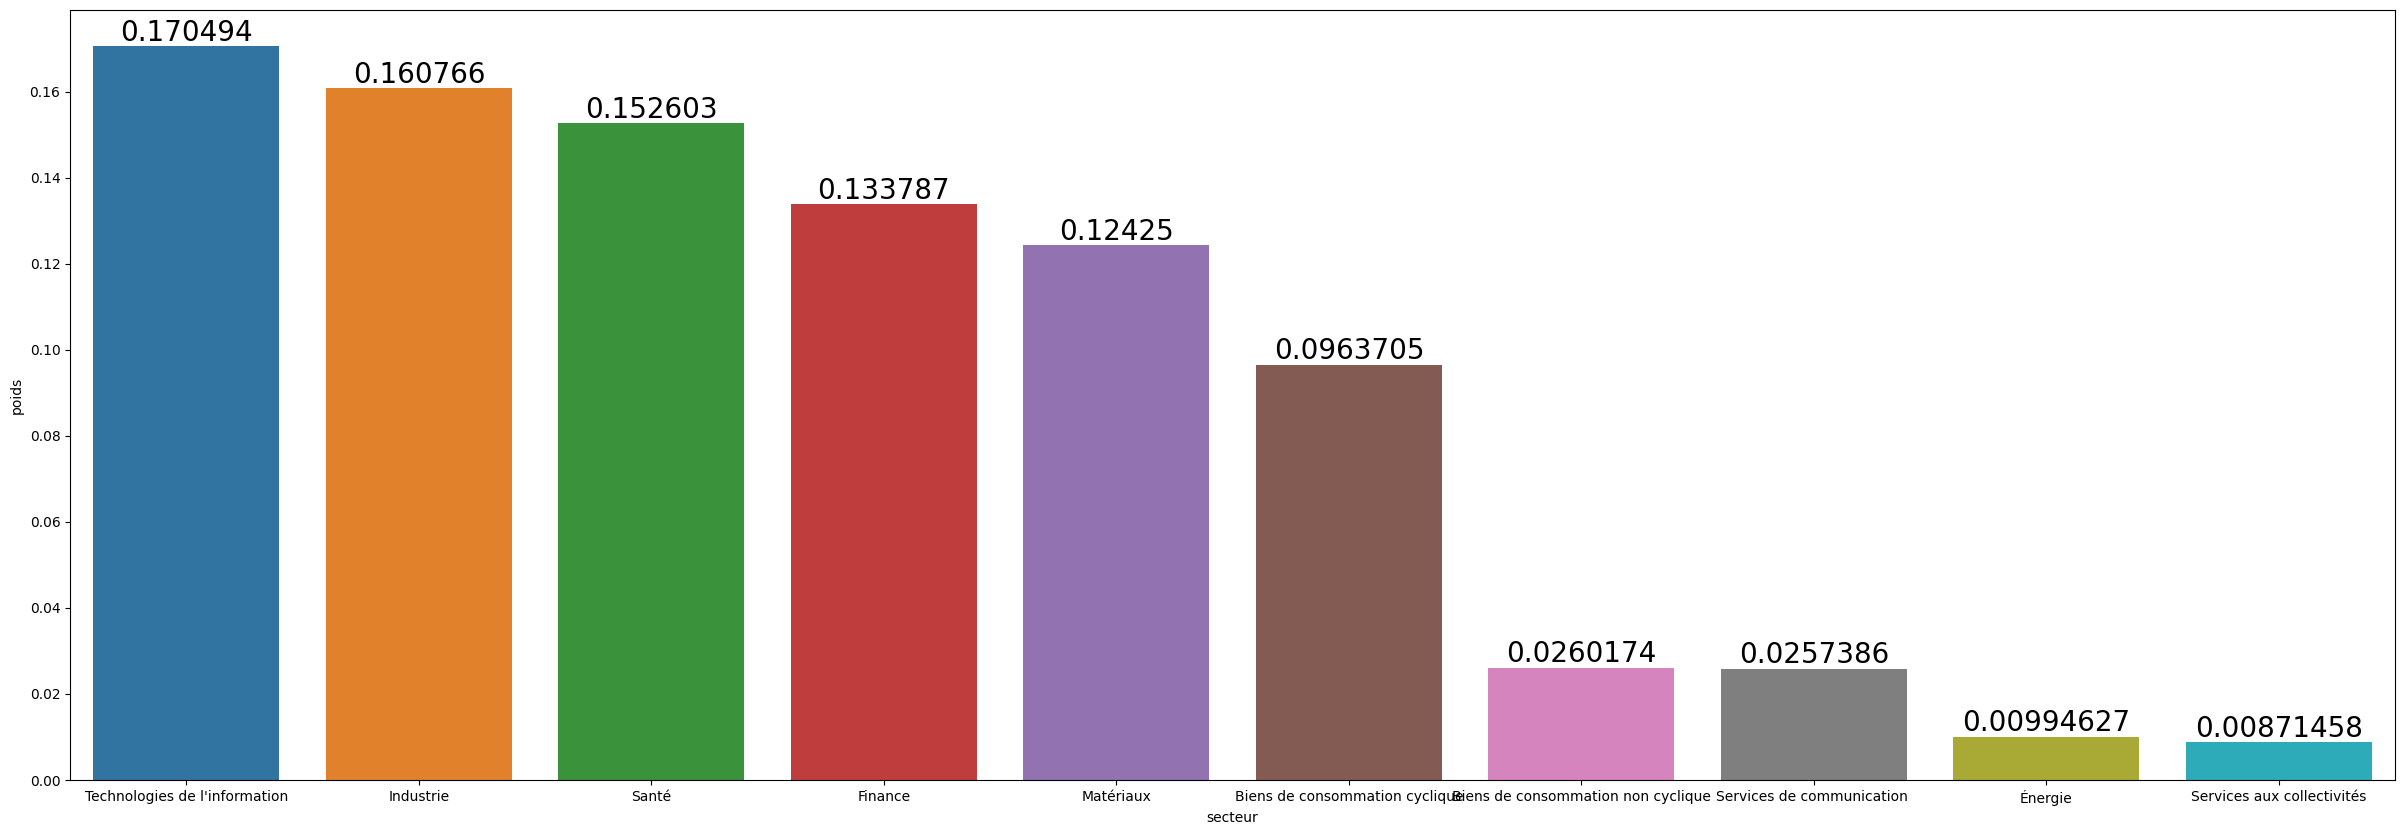

In [9]:
# Somme des poids des ISIN en fonction de leur secteur
target_col = 'secteur'
temp = msci_world.groupby(by=target_col)\
                                        .sum('poids')\
                                        .sort_values('poids', ascending=False)
temp.reset_index(inplace=True)

# Visualisation du poids des ISIN du MSCI World en fonction de leur devise 
plt.figure(figsize=(30, 10))


ax = sns.barplot(data=temp,
                    x=target_col,
                    y='poids',                               
                    ci = None,) 

ax.bar_label(ax.containers[0], fontsize=20);



## Répartition par devise


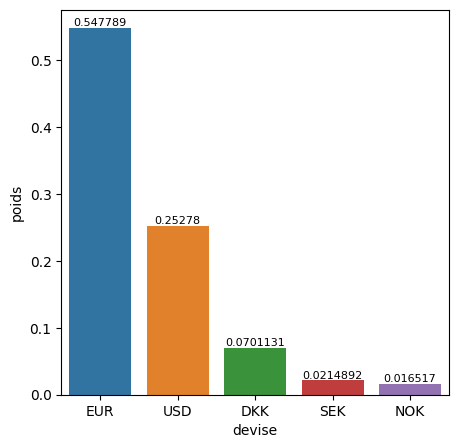

In [10]:
# Somme des poids des ISIN en fonction de leur devise
target_col = 'devise'
temp = msci_world.groupby(by=target_col)\
                                        .sum('poids')\
                                        .sort_values('poids', ascending=False)
temp.reset_index(inplace=True)

# Visualisation du poids des ISIN du MSCI World en fonction de leur devise 
plt.figure(figsize=(5, 5))
ax = sns.barplot(data=temp,
                    x=target_col,
                    y='poids',
                    ci = None,) 

ax.bar_label(ax.containers[0], fontsize=8);

## Répartition par pays


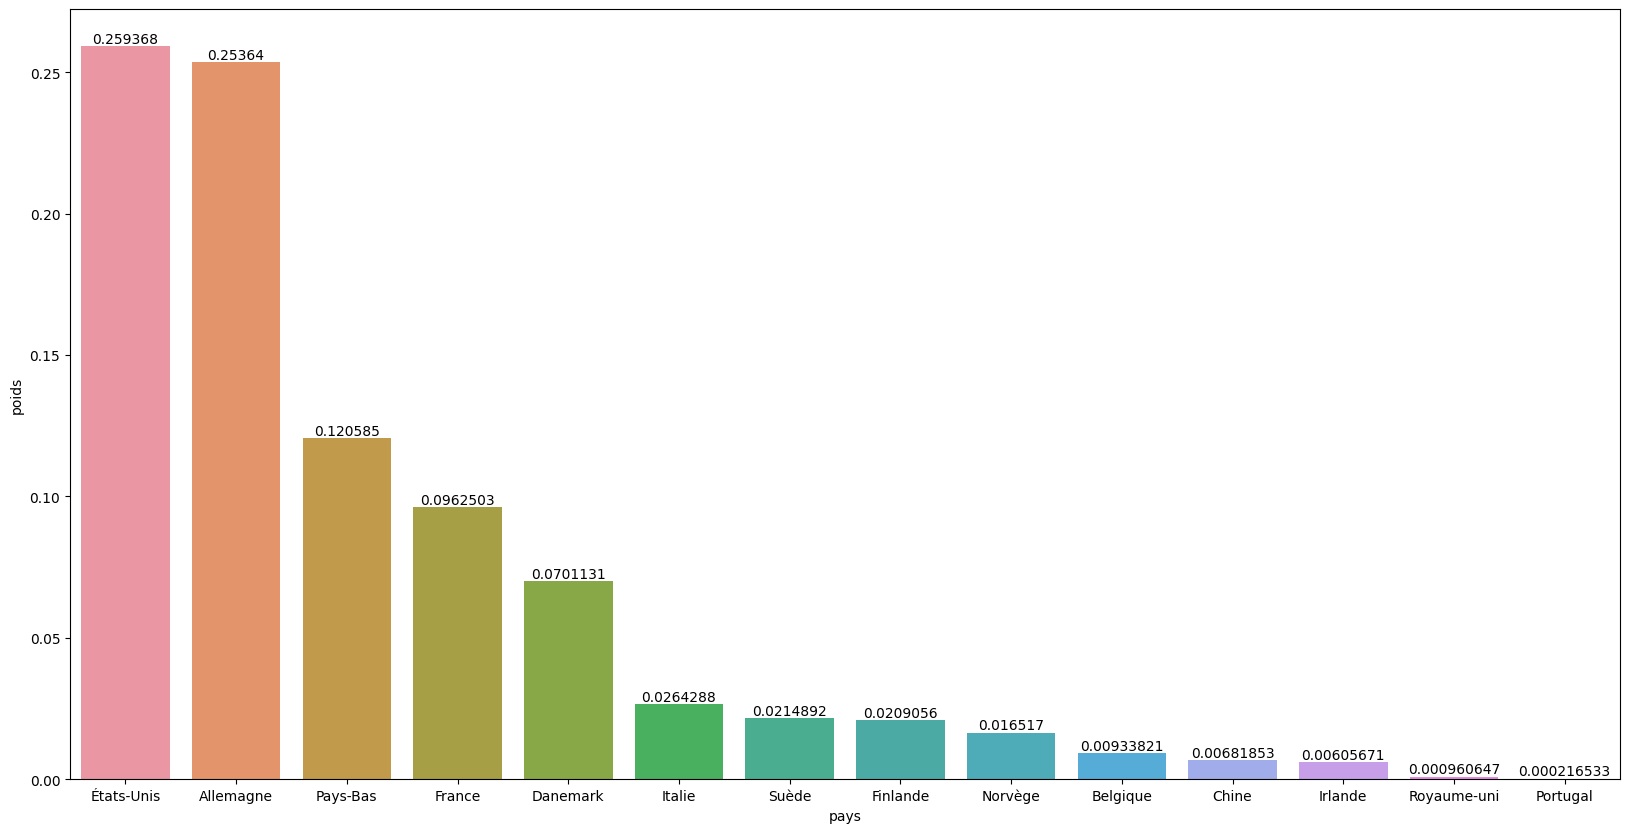

In [11]:
# Somme des poids des ISIN en fonction de leur pays
target_col = 'pays'
poids_devise = msci_world.groupby(by=target_col)\
                                        .sum('poids')\
                                        .sort_values('poids', ascending=False)
poids_devise.reset_index(inplace=True)

# Visualisation du poids des ISIN du MSCI World en fonction de leur devise 
plt.figure(figsize=(20, 10))

ax = sns.barplot(data=poids_devise,
                    x=target_col,
                    y='poids',
                    ci = None,) 

ax.bar_label(ax.containers[0], fontsize=10);




# Récupération des tickers


In [12]:
# # Récupération des codes isin
# codes = msci_world['code_isin'].values.tolist()

# # Récupération des tickers
# import requests
# import json
# import os

# isin_ticker_dict = {}
# isin_list = []
# ticker_list =[]

# # URL de l'API OpenFIGI
# url = "https://api.openfigi.com/v3/mapping"

# # Remplacez par votre clé API obtenue depuis OpenFIGI
# OPEN_FIGI_API_KEY = os.environ.get("OPEN_FIGI_API_KEY")
# api_key = OPEN_FIGI_API_KEY


# for code in codes : 
#     # ISIN à rechercher
# #     isin = "US0378331005"  # ISIN d'Apple Inc., à remplacer par celui que vous souhaitez
#     isin = code  # ISIN d'Apple Inc., à remplacer par celui que vous souhaitez

#     # Payload de la requête
#     headers = {
#         'Content-Type': 'application/json',
#         'X-OPENFIGI-APIKEY': api_key
#     }

#     payload = [{
#         "idType": "ID_ISIN",
#         "idValue": isin
#     }]

#     # Envoi de la requête à l'API
#     response = requests.post(url, headers=headers, data=json.dumps(payload))

#     # Vérification et affichage des résultats
#     if response.status_code == 200:
#         data = response.json()
#         if data and data[0]['data']:
#             ticker = data[0]['data'][0]['ticker']
#             print(f"Le ticker associé à l'ISIN {isin} est : {ticker}")
#             isin_list.append(isin)
#             ticker_list.append(ticker)
#         else:
#             print("Aucune donnée trouvée pour cet ISIN.")
#     else:
#         print(f"Erreur {response.status_code} : {response.text}")     

# # Create a dataframe with 2 columns : isin and ticker
# isin_ticker_dict['isin'] = isin_list
# isin_ticker_dict['ticker'] = ticker_list
# isin_ticker_df = pd.DataFrame(isin_ticker_dict)
# # Save the dataframe with isin and ticker locally
# path_to_data = '../data/raw_data/'
# isin_ticker_df.to_csv(path_to_data + 'isin_ticker_df.csv')

## Ajouter les tickers aux données initiales


In [13]:
# Charger la dataframe isin et tickers
path_to_data = '../data/raw_data/'
isin_ticker_df = pd.read_csv(path_to_data + 'isin_ticker_df.csv')
isin_ticker_df.head()

,Unnamed: 0,isin,ticker
0,0,DE0007164600,SAP
1,1,IE000S9YS762,LIN
2,2,DK0062498333,NO
3,3,NL0000235190,EADSF
4,4,US67066G1040,NVDA


In [14]:
# Keep only isin and ticker columns
isin_ticker_df = isin_ticker_df[['isin', 'ticker']].rename(columns={'isin' : 'code_isin'})
pd.merge(msci_world, isin_ticker_df, how='left', on = 'code_isin')

,code_isin,nom,classe_actifs,devise,poids,secteur,pays,ticker
0,DE0007164600,SAP SE / XETRA,EQUITY,EUR,0.079253,Technologies de l'information,Allemagne,SAP
1,IE000S9YS762,LINDE PLC,EQUITY,USD,0.053559,Matériaux,États-Unis,LIN
2,DK0062498333,NOVO NORDISK A/S-B,EQUITY,DKK,0.051679,Santé,Danemark,NO
3,NL0000235190,AIRBUS SE,EQUITY,EUR,0.051574,Industrie,France,EADSF
4,US67066G1040,NVIDIA CORP,EQUITY,USD,0.040901,Technologies de l'information,États-Unis,NVDA
...,...,...,...,...,...,...,...,...
147,FR0010411983,SCOR SE,EQUITY,EUR,0.000051,Finance,France,SCRUSD
148,PTGAL0AM0009,GALP ENERGIA -B,EQUITY,EUR,0.000034,Énergie,Portugal,GALP
149,US1491231015,CATERPILLAR INC,EQUITY,USD,0.000031,Industrie,États-Unis,CAT
150,SE0000114837,TRELLEBORG AB,EQUITY,SEK,0.000030,Industrie,Suède,TRELB


# Récupération des données temporelles


In [15]:
import yfinance as yf

ticker = "AAPL"  # Remplacer par le ticker associé à l'ISIN
# ticker = "STLA"  # Remplacer par le ticker associé à l'ISIN
data = yf.Ticker(ticker)

# Télécharger les données historiques
historical_data = data.history(period="10y")
historical_data.reset_index(inplace=True)

historical_data.set_index(keys = 'Date', inplace=True)
historical_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-10-01 00:00:00-04:00,22.328648,22.350847,21.909112,22.015661,205965200,0.0,0.0
2014-10-02 00:00:00-04:00,22.035633,22.246512,21.762603,22.175480,191031200,0.0,0.0
2014-10-03 00:00:00-04:00,22.073377,22.244298,21.984586,22.113333,173878400,0.0,0.0
2014-10-06 00:00:00-04:00,22.186584,22.341969,22.068936,22.113333,148204800,0.0,0.0
2014-10-07 00:00:00-04:00,22.071156,22.224321,21.915773,21.920212,168376800,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-25 00:00:00-04:00,224.929993,227.289993,224.020004,226.369995,42308700,0.0,0.0
2024-09-26 00:00:00-04:00,227.300003,228.500000,225.410004,227.520004,36636700,0.0,0.0
2024-09-27 00:00:00-04:00,228.460007,229.520004,227.300003,227.789993,34026000,0.0,0.0


In [16]:
# Shape
historical_data.shape

(2517, 7)

In [17]:
# Columns
historical_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [18]:
# Statistics
historical_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000
mean,88.988959,89.945445,88.089377,89.058759,1.211110e+08,0.002994,0.001589
std,62.568944,63.234455,61.943605,62.619068,6.948888e+07,0.024116,0.079729
min,20.642058,21.025082,20.520495,20.720034,2.404830e+07,0.000000,0.000000
25%,32.962709,33.144283,32.792781,32.969685,7.422990e+07,0.000000,0.000000
50%,54.548730,55.032342,53.986541,54.330788,1.034932e+08,0.000000,0.000000
75%,146.656321,148.473534,145.434628,146.876343,1.480468e+08,0.000000,0.000000
max,236.206595,236.955728,232.820515,234.548523,6.488252e+08,0.250000,4.000000


In [19]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-10-01 00:00:00-04:00 to 2024-10-01 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2517 non-null   float64
 1   High          2517 non-null   float64
 2   Low           2517 non-null   float64
 3   Close         2517 non-null   float64
 4   Volume        2517 non-null   int64  
 5   Dividends     2517 non-null   float64
 6   Stock Splits  2517 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.3 KB


## Duplicates


In [20]:
# Check number of rows before removing duplicates
print(f"Number of rows : {len(historical_data)}")

# Compute the number of duplicated rows
print(f"Number of duplicated rows : {historical_data.duplicated().sum()}")

# Remove duplicates
# data = data.drop_duplicates() 


Number of rows : 2517
Number of duplicated rows : 0


## Cleaning missing data


In [21]:
def get_missing_data(data):       
    # Counting the percentage of NaN for each column
    missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column

    # missing_data
    missing_data = missing_data[missing_data > 0]

    #Missing data column names
    missing_cols = missing_data.index.values.tolist()

    #Show missing data in percent
    return missing_data

missing_data = get_missing_data(historical_data)
missing_data


Series([], dtype: float64)

In [22]:
# historical_data.dropna(axis = 0, subset='Close_plus_1', inplace=True)

In [23]:
missing_data = get_missing_data(historical_data)
missing_data

Series([], dtype: float64)

In [24]:
historical_data;

# Identificate numerical columns


In [25]:
# Extract numerical columns from original dataset
numerical_columns = historical_data.select_dtypes(include = np.number).columns
numerical_columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

# Check outliers



### Visual checks for outliers


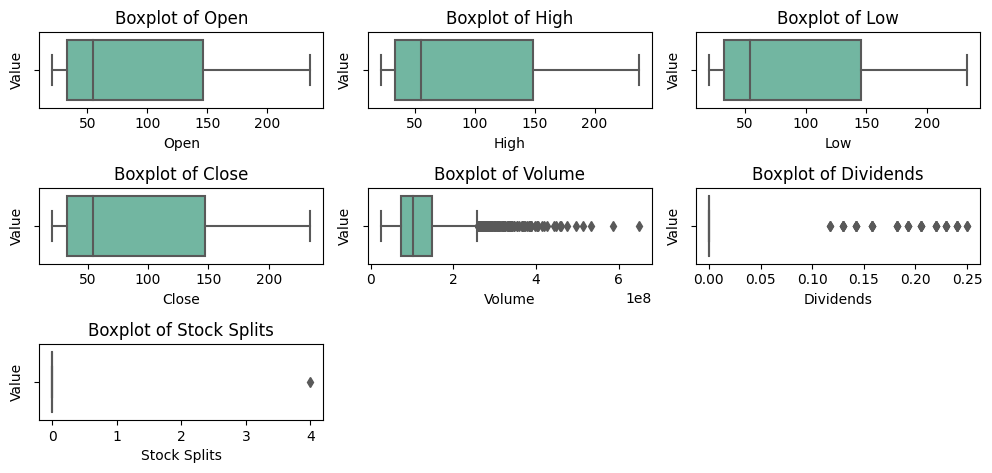

In [26]:
# Plot boxplots of each numerical column
plt.figure(figsize=(10, 20))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(13, 3, i)    
    sns.boxplot(x=historical_data[column], palette='Set2')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


<span style="font-family:Comic Sans MS; color:red">Plot a specific boxplot. Insert column name below : </span>
    

In [27]:
specific_column = 'Volume'


Text(0, 0.5, 'Value')

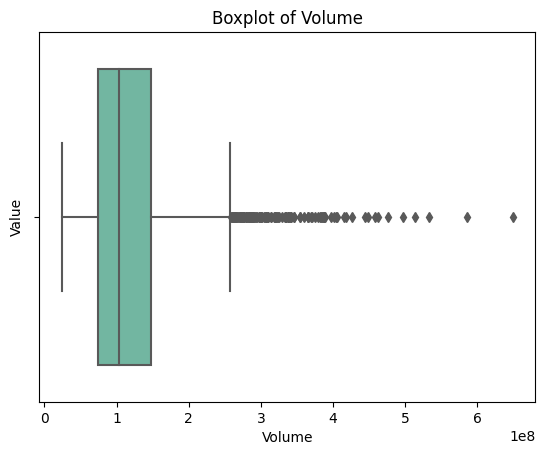

In [28]:
# Plot a specific boxplot
sns.boxplot(x=historical_data[specific_column], palette='Set2')
plt.title(f'Boxplot of {specific_column}')
plt.xlabel(specific_column)
plt.ylabel('Value')


### Numerical check for outliers


<span style="font-family:Comic Sans MS; color:red"> Let's numerically extract the columns with outliers ! </span>


In [29]:
# Identify the columns with outliers
numerical_columns_w_outliers = []
numerical_columns_no_outliers = []

for col in numerical_columns: 
    # Calculate IQR
    iqr_value = iqr(historical_data[col])

    #Calculate 1st quartile
    q1 = np.percentile(historical_data[col],25)

    #Calculate 3rd quartile
    q3 = np.percentile(historical_data[col],75)

    #Calculate lower limit below which data point is considered an outlier
    outlier_lim_low = q1 - 1.5 * iqr_value

    #Calculate higher limit above which data point is considered an outlier
    outlier_lim_high = q3 + 1.5 * iqr_value
    
    #Calculate number of 'low' outliers
    outlier_condition_low = historical_data[col] < outlier_lim_low
    number_outliers_low = len(historical_data[outlier_condition_low][col])
    
    #Calculate number of 'high' outliers
    outlier_condition_high = historical_data[col] > outlier_lim_high
    number_outliers_high = len(historical_data[outlier_condition_high][col])
    
    #Calculate total number of outliers
    number_outliers_total = number_outliers_low + number_outliers_high
    
#     print(f'------------------  {col}  -----------------------')
#     print(f'Number of outliers : {number_outliers_total}')
#     print('---------------------------------------------------')
    
    #If any outliers in column, column is added to a list of columns with outliers
    if number_outliers_total > 0:
        numerical_columns_w_outliers.append(col)
    elif number_outliers_total == 0:
        numerical_columns_no_outliers.append(col)
        
        

<span style="font-family:Comic Sans MS; color:red">Let's display the numerical columns WITH outliers :  </span>


In [30]:
numerical_columns_w_outliers


['Volume', 'Dividends', 'Stock Splits']

<span style="font-family:Comic Sans MS; color:red">Let's display the numerical columns WITHOUT outliers :  </span>


In [31]:
numerical_columns_no_outliers


['Open', 'High', 'Low', 'Close']

### Scaling numerical columns with outliers


In [32]:
historical_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-10-01 00:00:00-04:00,22.328648,22.350847,21.909112,22.015661,205965200,0.0,0.0
2014-10-02 00:00:00-04:00,22.035633,22.246512,21.762603,22.175480,191031200,0.0,0.0
2014-10-03 00:00:00-04:00,22.073377,22.244298,21.984586,22.113333,173878400,0.0,0.0
2014-10-06 00:00:00-04:00,22.186584,22.341969,22.068936,22.113333,148204800,0.0,0.0
2014-10-07 00:00:00-04:00,22.071156,22.224321,21.915773,21.920212,168376800,0.0,0.0


In [33]:
from sklearn.preprocessing import RobustScaler

# Instantiate the robust scaler
rb_scaler = RobustScaler() 

# Fit the robust scaler on X_train
rb_scaler.fit(historical_data[numerical_columns_w_outliers]) 

# Transform X_train and X_test through the fitted robust scaler
historical_data[numerical_columns_w_outliers] = rb_scaler.transform(historical_data[numerical_columns_w_outliers])


# Scaling numerical columns with NO outliers




In [34]:
historical_data[numerical_columns_no_outliers].describe()

,Open,High,Low,Close
count,2517.000000,2517.000000,2517.000000,2517.000000
mean,88.988959,89.945445,88.089377,89.058759
std,62.568944,63.234455,61.943605,62.619068
min,20.642058,21.025082,20.520495,20.720034
25%,32.962709,33.144283,32.792781,32.969685
50%,54.548730,55.032342,53.986541,54.330788
75%,146.656321,148.473534,145.434628,146.876343
max,236.206595,236.955728,232.820515,234.548523


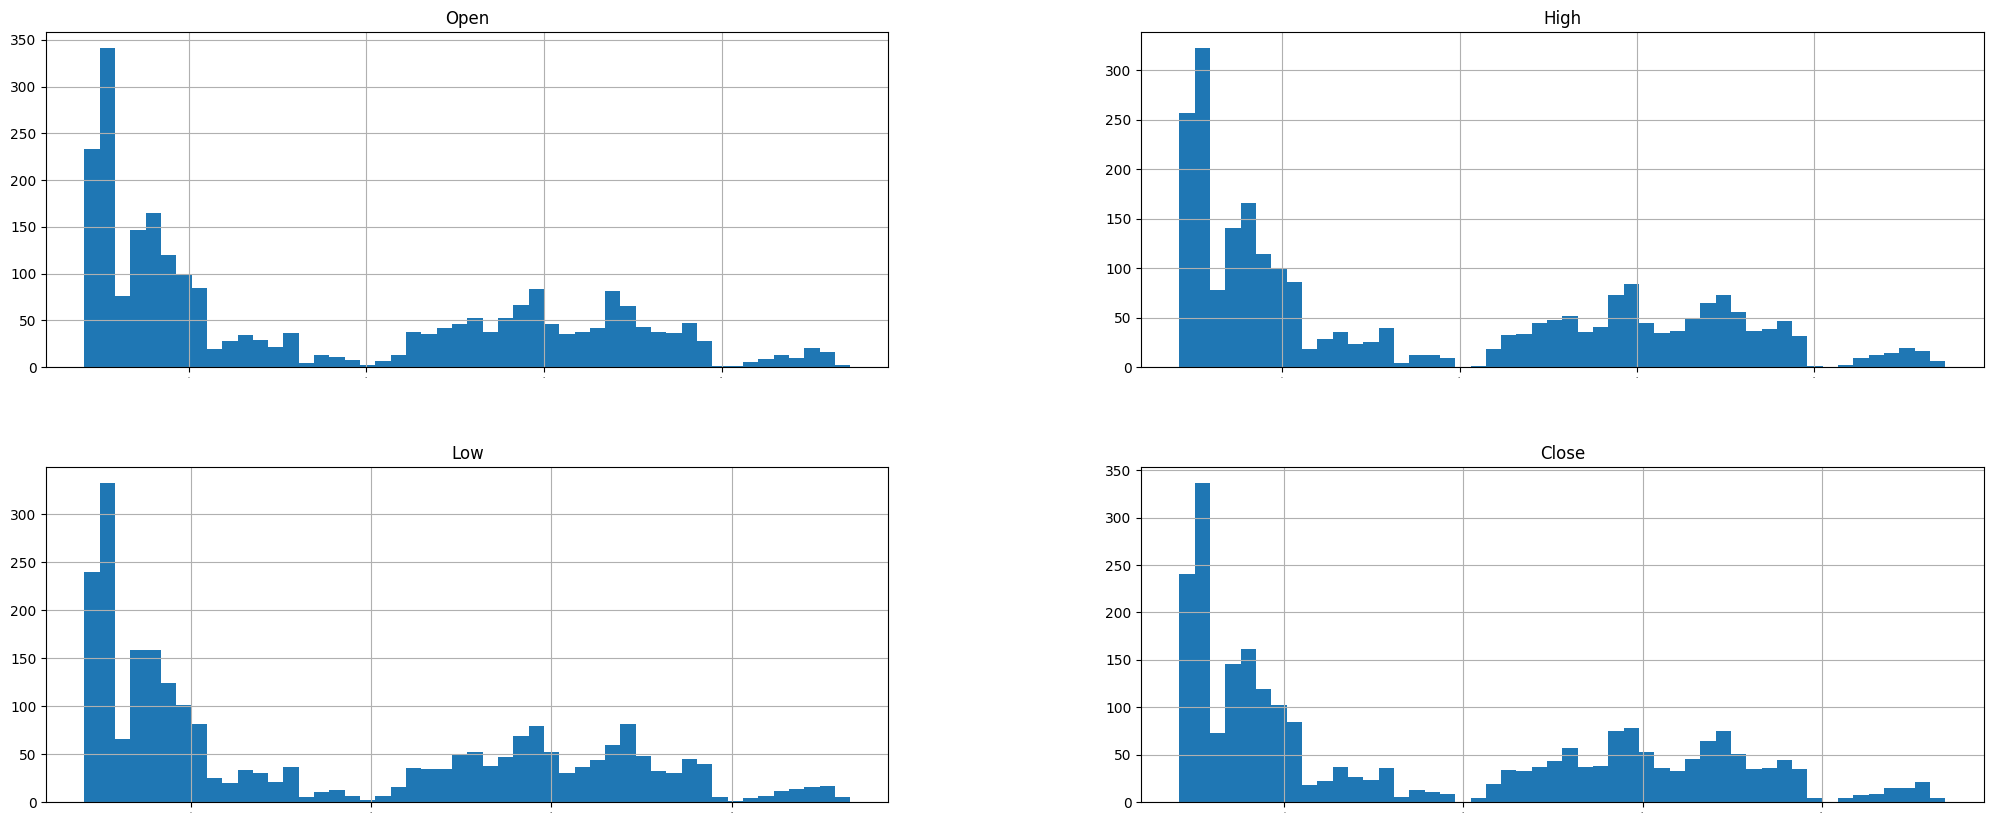

In [35]:
# Data histograms
historical_data[numerical_columns_no_outliers].hist(bins = 50, figsize = (25,10), xlabelsize=0)
plt.show()


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

numerical_columns_no_outliers = 'Close'

# Instantiate the scaler

# std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Fit the scaler on entire data
# minmax_scaler.fit(historical_data[numerical_columns_no_outliers]) 
minmax_scaler.fit(historical_data['Close'].values.reshape(-1,1)) 

# Transform entire data through the fitted scaler
# historical_data[numerical_columns_no_outliers] = minmax_scaler.transform(historical_data[numerical_columns_no_outliers])
historical_data[numerical_columns_no_outliers] = minmax_scaler.transform(historical_data['Close'].values.reshape(-1,1))


## Define X_train, X_test, y_train and y_test



In [37]:
# Essai avec Close uniquement
data = historical_data['Close']
data

Date
2014-10-01 00:00:00-04:00    0.006059
2014-10-02 00:00:00-04:00    0.006807
2014-10-03 00:00:00-04:00    0.006516
2014-10-06 00:00:00-04:00    0.006516
2014-10-07 00:00:00-04:00    0.005613
                               ...   
2024-09-25 00:00:00-04:00    0.961752
2024-09-26 00:00:00-04:00    0.967130
2024-09-27 00:00:00-04:00    0.968393
2024-09-30 00:00:00-04:00    0.992758
2024-10-01 00:00:00-04:00    0.957683
Name: Close, Length: 2517, dtype: float64

In [38]:
date_mesure = data.index.values.reshape(-1,1)
print(date_mesure.shape)


(2517, 1)


In [39]:
print(data.shape)
data = data.values.reshape(-1, 1)
print(data.shape)

(2517,)
(2517, 1)


In [40]:
# Création des ensembles d'entraînement et de test
data_percentage = 0.8
train_size = int(len(data) * data_percentage)

train_data = data[:train_size]
test_data = data[train_size:]

# Gestion des dates d'entraînement et de test
train_dates = date_mesure[:train_size]
test_dates = date_mesure[train_size:]


In [41]:
# Fonction pour créer des séquences (X) et des labels (y)
def create_dataset(dataset, time_step=60, dates=None):
    X, y = [], []
    time = []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i - time_step:i, 0])       
        y.append(dataset[i, 0])
        time.append(dates[i,0])
    return np.array(X), np.array(y), np.array(time)


# 5. Créer les jeux de données pour l'entraînement et le test
time_step = 1  # 10 jours de données passées pour prédire le prochain
X_train, y_train, y_train_dates = create_dataset(train_data, time_step, train_dates)
X_test, y_test, y_test_dates = create_dataset(test_data, time_step, test_dates)

In [42]:
# # Fonction pour créer des séquences (X) et des labels (y)
# def create_dataset(dataset, time_step=60):
#     X, y = [], []
#     for i in range(time_step, len(dataset)):
#         X.append(dataset[i - time_step:i, 0])       
#         y.append(dataset[i, 0])
#     return np.array(X), np.array(y)


# # 5. Créer les jeux de données pour l'entraînement et le test
# time_step = 10  # 10 jours de données passées pour prédire le prochain
# X_train, y_train = create_dataset(train_data, time_step)
# X_test, y_test = create_dataset(test_data, time_step)

In [43]:
# Display shapes
print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of X_test : {X_test.shape}")
print(f"Shape of y_test : {y_test.shape}")


Shape of X_train : (2012, 1)
Shape of y_train : (2012,)
Shape of X_test : (503, 1)
Shape of y_test : (503,)


# Expand dimensions



In [44]:
# Reshape les données pour LSTM (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of X_test : {X_test.shape}")


Shape of X_train : (2012, 1, 1)
Shape of X_test : (503, 1, 1)


# Create RNN model


In [45]:
# Create RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

def define_RNN_model():
    # 1- RNN Architecture
    model = Sequential()
    model.add(layers.LSTM(units=2, activation='tanh', input_shape=X_train.shape[1:3]))
    model.add(layers.Dense(1, activation="linear"))

    # 2- Compilation
    model.compile(loss='mse', optimizer='adam', metrics =['mse', 'mae'])
    
    return model

# Train RNN model

In [46]:
%%time 
model = define_RNN_model()

# Fitting RNN model
es = EarlyStopping(patience = 20, restore_best_weights=True)

history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=16,
                    epochs=1000,
                    verbose=0,
                    callbacks=[es],
                    validation_split=0.3,
                    shuffle=False)


CPU times: user 7.94 s, sys: 2.03 s, total: 9.97 s
Wall time: 8.88 s


In [47]:
# history.__dict__

In [48]:
def plot_loss_metric(history, metric, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))

    # --- LOSS --- 

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])

    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')

    min_loss = min(min(history.history['loss']),min(history.history['val_loss']))
    max_loss = max(max(history.history['loss']),max(history.history['val_loss']))
    ax[0].set_ylim((min_loss,max_loss))

    ax[0].legend(['Train', 'Test'], loc='best')

    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- METRIC

    ax[1].plot(history.history[metric])
    ax[1].plot(history.history[f'val_{metric}'])

    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel(metric)
    
    ax[1].set_xlabel('Epoch')

    ax[1].legend(['Train', 'Test'], loc='best')
    
    min_metric = min(min(history.history[metric]),min(history.history[f'val_{metric}']))
    max_metric = max(max(history.history[metric]),max(history.history[f'val_{metric}']))
    ax[1].set_ylim((min_metric,max_metric))

    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

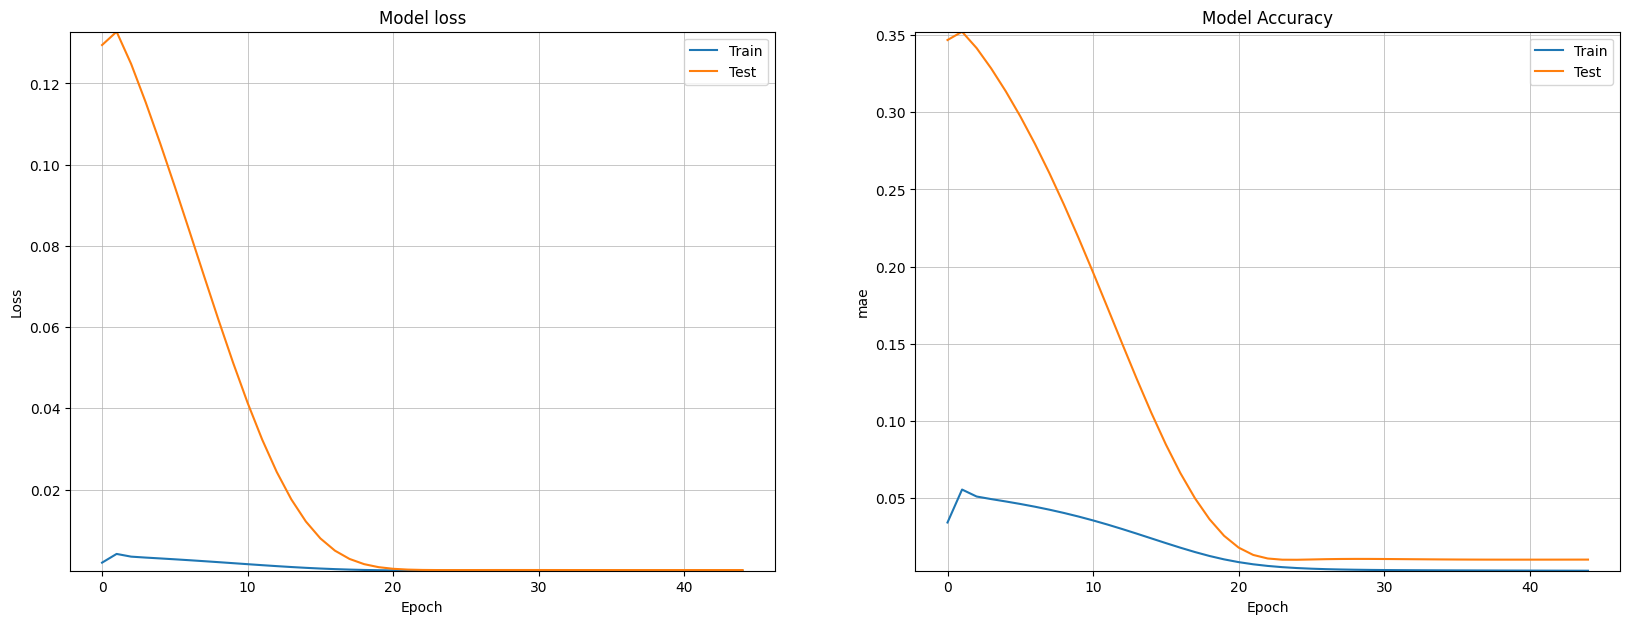

In [49]:
plot_loss_metric(history, 'mae')


In [50]:
model.evaluate(X_test,y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2410e-04 - mae: 0.0171 - mse: 5.2410e-04 


[0.0013204253045842052, 0.0013204253045842052, 0.02708854153752327]

# Predictions


In [51]:
y_pred = model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [52]:
print(y_test.shape)
y_test = y_test.reshape(-1,1)
print(y_test.shape)

(503,)
(503, 1)


In [53]:
print(y_train.shape)
y_train = y_train.reshape(-1,1)
print(y_train.shape)

(2012,)
(2012, 1)


In [54]:
y_test = minmax_scaler.inverse_transform(y_test)  # Reconvertir en prix original
y_pred = minmax_scaler.inverse_transform(y_pred)  # Reconvertir en prix original
y_train = minmax_scaler.inverse_transform(y_train)  # Reconvertir en prix original

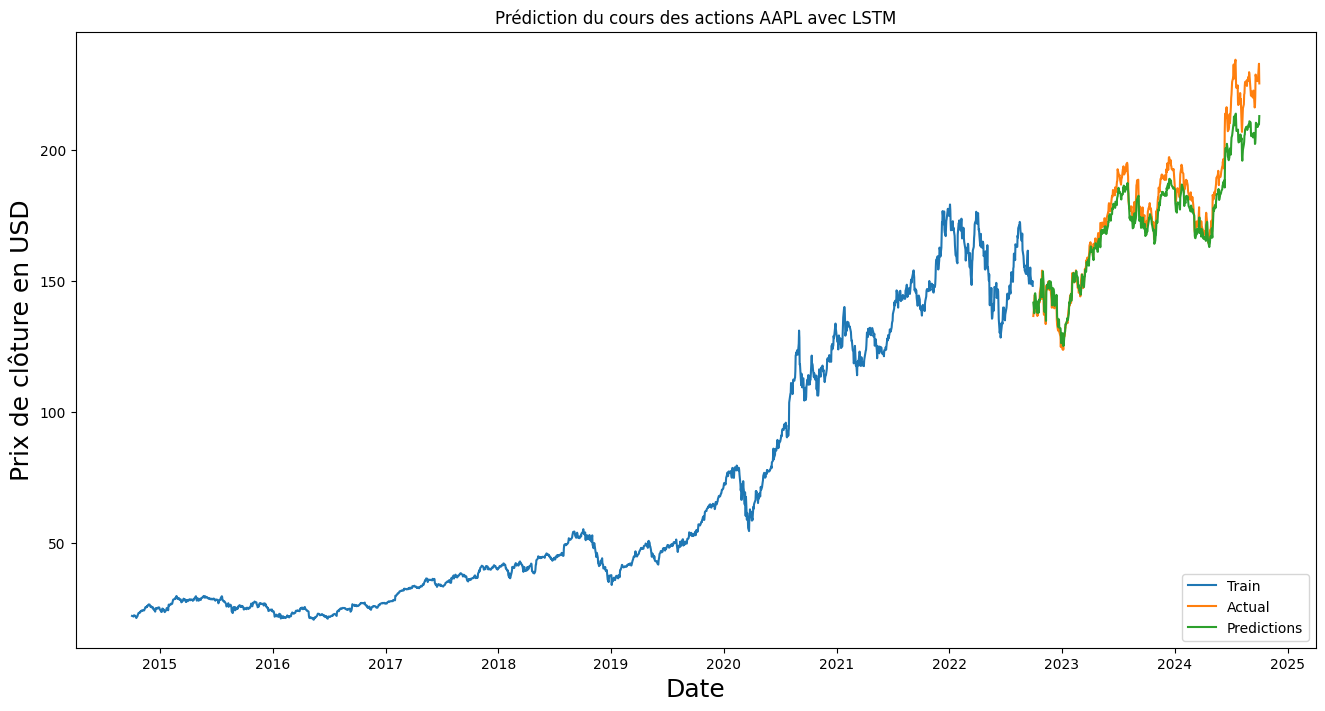

In [55]:
# Plot les prix de clôture réels vs prédits
plt.figure(figsize=(16,8))
plt.title(f'Prédiction du cours des actions {ticker} avec LSTM')
plt.plot(y_train_dates, y_train)
plt.plot(y_test_dates, y_test)
plt.plot(y_test_dates, y_pred)
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Prix de clôture en USD', fontsize=18)
plt.show()

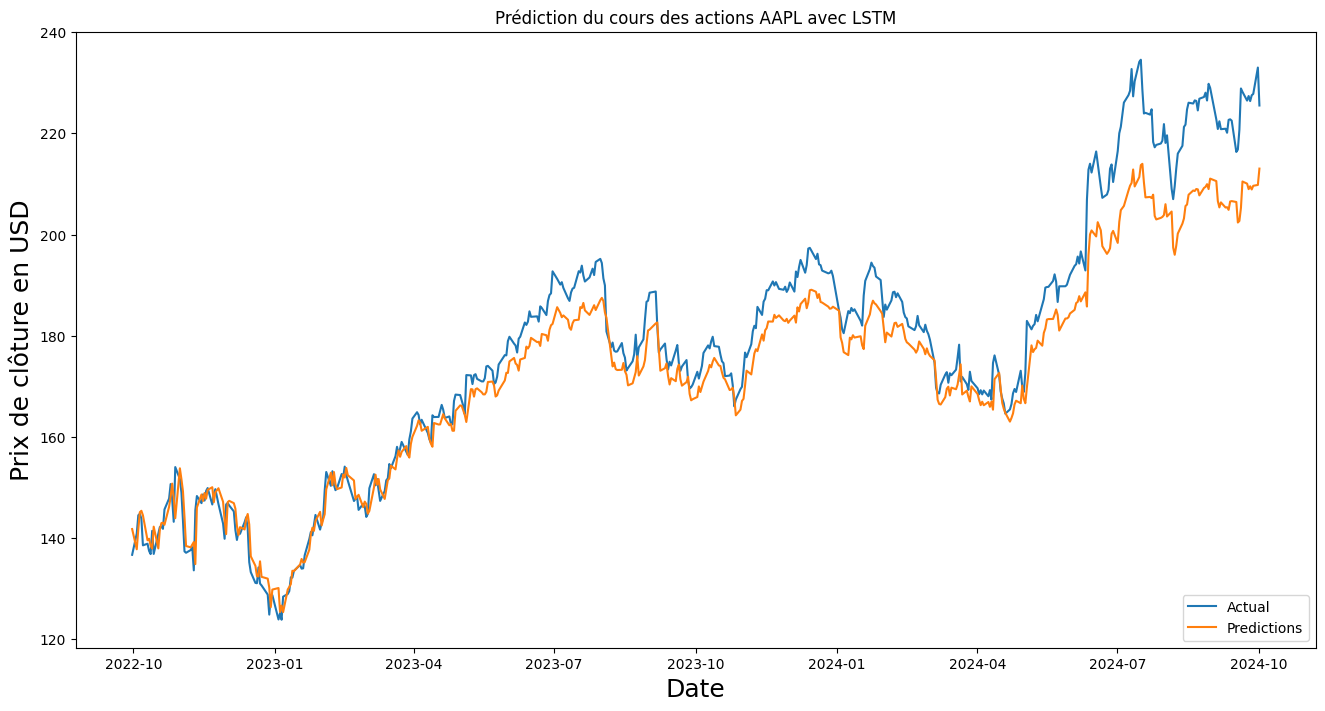

In [56]:
# Plot les prix de clôture réels vs prédits
plt.figure(figsize=(16,8))
plt.title(f'Prédiction du cours des actions {ticker} avec LSTM')
plt.plot(y_test_dates, y_test)
plt.plot(y_test_dates, y_pred)
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Prix de clôture en USD', fontsize=18)
plt.show()


In [57]:
# Afficher les dernières lignes des données réelles et prédites
def retrieve_element(s):
    return s[0]

actual_and_pred = pd.DataFrame({'actual' : y_test.tolist(),
                                 'predictions' : y_pred.tolist()},
                                 index = y_test_dates)

actual_and_pred['actual'] = actual_and_pred['actual'].apply(retrieve_element)
actual_and_pred['predictions'] = actual_and_pred['predictions'].apply(retrieve_element)
actual_and_pred['diff'] = np.abs(actual_and_pred['actual'] - actual_and_pred['predictions'])

actual_and_pred.describe()

,actual,predictions,diff
count,503.000000,503.000000,503.000000
mean,177.364130,172.311415,5.792305
std,25.786529,20.653793,5.184206
min,123.855087,125.356010,0.000870
25%,160.155144,158.641327,2.134659
50%,177.043732,173.260941,4.350571
75%,190.827484,184.159592,7.395370
max,234.548523,213.971649,23.618057
